In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv('data.csv')
df.head()

,class_name,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [ ]:
df = df.drop(['beats'], axis=1)

In [ ]:
df['class_name'] = df['class_name'].astype('category')
df['class_label'] = df['class_name'].cat.codes

In [ ]:
X = df.iloc[:, 1:28]
y = df['class_label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

clf_rf = RandomForestClassifier(random_state=0, n_jobs=-1).fit(X_train_scaled, y_train)
importances_rf = clf_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
names_rf = [X.columns.values[i] for i in indices_rf]


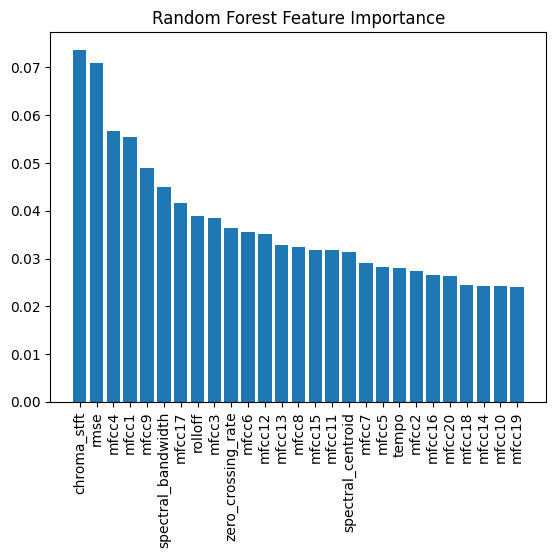

Random Forest Accuracy: 70.40%


In [ ]:
plt.figure()
plt.title("Random Forest Feature Importance")
plt.bar(range(X.shape[1]), importances_rf[indices_rf])
plt.xticks(range(X.shape[1]), names_rf, rotation=90)
plt.show()
y_pred_rf = clf_rf.predict(X_test_scaled)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

In [ ]:
from sklearn.metrics import classification_report
report_rf = classification_report(y_test, y_pred_rf)
print("classification report for random forest:")
print(report_rf)

classification report for random forest:
              precision    recall  f1-score   support

           0       0.70      0.63      0.67        30
           1       0.97      0.91      0.94        33
           2       0.54      0.61      0.57        23
           3       0.50      0.59      0.54        17
           4       0.67      0.69      0.68        26
           5       0.67      0.76      0.71        21
           6       0.79      0.85      0.82        27
           7       0.81      0.81      0.81        27
           8       0.75      0.60      0.67        30
           9       0.40      0.38      0.39        16

    accuracy                           0.70       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.71      0.70      0.70       250



In [ ]:
clf_dt = DecisionTreeClassifier(random_state=0).fit(X_train_scaled, y_train)
importances_dt = clf_dt.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]
names_dt = [X.columns.values[i] for i in indices_dt]

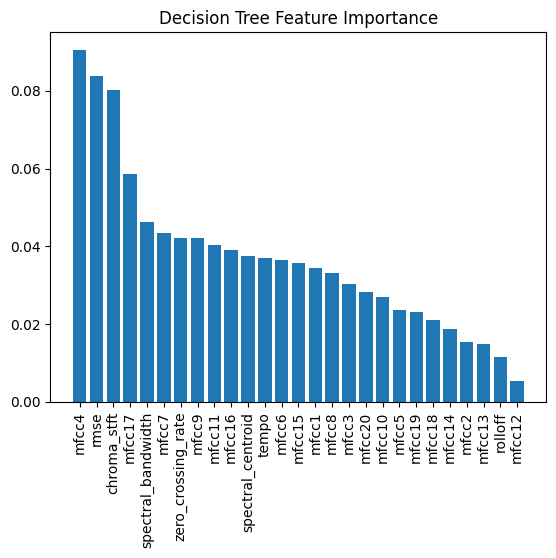

Decision Tree Accuracy: 44.40%


In [ ]:
plt.figure()
plt.title("Decision Tree Feature Importance")
plt.bar(range(X.shape[1]), importances_dt[indices_dt])
plt.xticks(range(X.shape[1]), names_dt, rotation=90)
plt.show()
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train_scaled, y_train)

y_pred_dt = clf_dt.predict(X_test_scaled)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

In [ ]:
classification_report_dt = classification_report(y_test, y_pred_dt)
print("classification report for Decision Tree:")
print(classification_report_dt)

classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.48      0.33      0.39        30
           1       0.91      0.64      0.75        33
           2       0.29      0.26      0.27        23
           3       0.30      0.47      0.36        17
           4       0.44      0.62      0.52        26
           5       0.37      0.48      0.42        21
           6       0.71      0.56      0.62        27
           7       0.60      0.56      0.58        27
           8       0.43      0.30      0.35        30
           9       0.04      0.06      0.05        16

    accuracy                           0.44       250
   macro avg       0.46      0.43      0.43       250
weighted avg       0.50      0.44      0.46       250



In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
knn_score = knn.score(X_test_scaled, y_test)
print(f"K-Nearest Neighbors accuracy: {knn_score}")

y_pred = knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_knn * 100:.2f}%")

K-Nearest Neighbors accuracy: 0.624
Accuracy: 62.40%


In [ ]:
report_knn = classification_report(y_test, y_pred)
print("classification report for KNN algorithm:")
print(report_knn)

classification report for KNN algorithm:
              precision    recall  f1-score   support

           0       0.78      0.60      0.68        30
           1       0.94      0.94      0.94        33
           2       0.43      0.70      0.53        23
           3       0.26      0.47      0.33        17
           4       0.62      0.50      0.55        26
           5       0.55      0.57      0.56        21
           6       0.86      0.67      0.75        27
           7       0.81      0.78      0.79        27
           8       0.61      0.47      0.53        30
           9       0.38      0.31      0.34        16

    accuracy                           0.62       250
   macro avg       0.62      0.60      0.60       250
weighted avg       0.66      0.62      0.63       250



In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', C=10).fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)
print(clf.score(X_test_scaled, y_test))
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train_scaled, y_train)

y_pred_svm = clf_svm.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

0.732
SVM Accuracy: 69.20%


In [ ]:
classification_report_svm = classification_report(y_test, y_pred_svm)
print("classification report for SVM:")
print(classification_report_svm)

classification report for SVM:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72        30
           1       1.00      0.91      0.95        33
           2       0.64      0.70      0.67        23
           3       0.45      0.59      0.51        17
           4       0.62      0.62      0.62        26
           5       0.76      0.76      0.76        21
           6       0.80      0.74      0.77        27
           7       0.82      0.85      0.84        27
           8       0.64      0.53      0.58        30
           9       0.25      0.31      0.28        16

    accuracy                           0.69       250
   macro avg       0.67      0.67      0.67       250
weighted avg       0.71      0.69      0.70       250



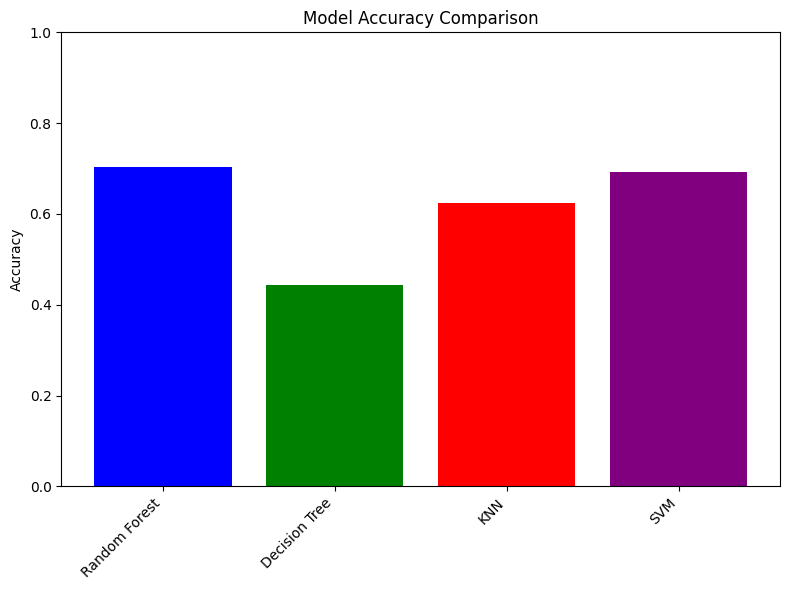

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
models = ['Random Forest', 'Decision Tree', 'KNN', 'SVM']
accuracies = [accuracy_rf, accuracy_dt, accuracy_knn, accuracy_svm]
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
pip install librosa


In [ ]:
import librosa
import numpy as np

def metadata(file_path):
    y, sr = librosa.load(file_path)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spec_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zero_crossing = librosa.feature.zero_crossing_rate(y=y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    metadata_dict = {
        'tempo': tempo,
        'chroma_stft': np.mean(chroma_stft),
        'rmse': np.mean(rmse),
        'spectral_centroid': np.mean(spec_centroid),
        'spectral_bandwidth': np.mean(spec_bw),
        'rolloff': np.mean(spec_rolloff),
        'zero_crossing_rates': np.mean(zero_crossing)
    }

    for i in range(1, 21):
        metadata_dict.update({'mfcc'+str(i): np.mean(mfcc[i-1])})


    return list(metadata_dict.values())


file_path = '/content/sample-12s.wav'
a= metadata(file_path)
print(a)


[array([151.99908088]), 0.3320541, 0.04709035, 2615.912998729243, 2124.353304182173, 4896.771539317718, 0.1662176724137931, -295.186, 37.75413, -26.246416, -0.5740717, -22.975971, -1.8604411, -15.927876, -0.15119025, -5.4817533, 0.7382591, -10.305361, -4.5828176, -4.078189, 11.070571, 10.935195, 17.67712, 11.5368805, 11.998498, 7.137907, 4.352992]


In [ ]:
lookup_genre_name = dict(zip(df['class_label'].unique(), df['class_name'].unique()))

In [ ]:
import numpy as np

d1 = np.array([x if np.isscalar(x) else np.mean(x) for x in a])

data1 = scaler.transform([d1])
genre_prediction = clf.predict(data1)
print("The song is predicted as:",lookup_genre_name[genre_prediction[0]])

The song is predicted as: classical


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
d1 = np.array([x if np.isscalar(x) else np.mean(x) for x in a])
data1 = scaler.transform([d1])
genre_prediction = knn.predict(data1)
print("The song is predicted as:",lookup_genre_name[genre_prediction[0]])

The song is predicted as: classical


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:

d1 = np.array([x if np.isscalar(x) else np.mean(x) for x in a])

data1 = scaler.transform([d1])
genre_prediction = clf_svm.predict(data1)
print("The song is predicted as:",lookup_genre_name[genre_prediction[0]])

The song is predicted as: classical


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
d1 = np.array([x if np.isscalar(x) else np.mean(x) for x in a])


data1 = scaler.transform([d1])

genre_prediction = clf_dt.predict(data1)
print("The song is predicted as:",lookup_genre_name[genre_prediction[0]])

The song is predicted as: hiphop


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:

d1 = np.array([x if np.isscalar(x) else np.mean(x) for x in a])

data1 = scaler.transform([d1])
genre_prediction = clf_rf.predict(data1)
print("The song is predicted as:",lookup_genre_name[genre_prediction[0]])

The song is predicted as: jazz


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
